# Intro
Simple Program to load and check the 4STAR archive files.

For RA of KORUS-AQ, aod and Gases

# Load the defaults and imports

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [2]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
fp ='C:/Users/sleblan2/Research/KORUS-AQ/'

# load the files

In [3]:
days = ['20160501','20160503','20160504','20160506']

In [5]:
outaod_RA = []
outaod_head_RA = []
outgas_RA = []
outgas_head_RA = []
for d in days:
    fname_aod = fp+'aod_ict/korusaq-4STAR-AOD_DC8_{}_RA.ict'.format(d)
    tt,th = load_ict(fname_aod,return_header=True)
    outaod_RA.append(tt)
    outaod_head_RA.append(th)
    
    fname_gas = fp+'gas_ict/korusaq-4STAR-GASES_DC8_{}_RA.ict'.format(d)
    ttr,thr = load_ict(fname_gas,return_header=True)
    outgas_RA.append(ttr)
    outgas_head_RA.append(thr)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'qual_flag')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'qual_flag')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AO

In [6]:
for i,s in enumerate(outaod_head_RA[0]):
    for ig,g in enumerate(outaod_head_RA):
        if not s==g[i]:
            print 'no match on RA aod string line {}: {} and RA of num {}:{} '.format(i,s,ig,g[i])
    for ir,r in enumerate(outgas_head_RA):
        if not s==r[i]:
            print 'no match on RA gas string line {}: {} and RA of num {}:{} '.format(i,s,ir,r[i])

no match on RA gas string line 0: 56, 1001
 and RA of num 0:49, 1001
 
no match on RA gas string line 0: 56, 1001
 and RA of num 1:49, 1001
 
no match on RA gas string line 0: 56, 1001
 and RA of num 2:49, 1001
 
no match on RA gas string line 0: 56, 1001
 and RA of num 3:49, 1001
 
no match on RA aod string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 1:2016, 05, 03, 2016, 05, 10
 
no match on RA aod string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 2:2016, 05, 04, 2016, 05, 10
 
no match on RA aod string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 3:2016, 05, 06, 2016, 05, 10
 
no match on RA gas string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 1:2016, 05, 03, 2016, 05, 10
 
no match on RA gas string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 2:2016, 05, 04, 2016, 05, 10
 
no match on RA gas string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 3:2016, 05, 06, 2016, 05, 10
 
no match on RA aod string line 8: Start_UTC, seconds, Elapsed seconds from

IndexError: list index out of range

In [7]:
print 'day:       AOD RA     GAS RA'
for i,d in enumerate(days):
    try:
        print '{}: {}  {}'.format(d,len(outaod_RA[i]['Start_UTC']),len(outgas_RA[i]['Start_UTC']))
    except:
        print '{}: missed'.format(d)

day:       AOD RA     GAS RA
20160501: 30318  30318
20160503: 29663  29663
20160504: 17402  17402
20160506: 28993  28993


In [8]:
outaod_head_RA[0]

['56, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'KORUS-AQ\n',
 '1, 1\n',
 '2016, 05, 01, 2016, 05, 10\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20160501\n',
 '22\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'Latitude, deg, Aircraft latitude (deg) at the indicated time\n',
 'Longitude, deg, Aircraft longitude (deg) at the indicated time\n',
 'GPS_Alt, m, Aircraft GPS geometric altitude (m) at the indicated time\n',
 'qual_flag, unitless, quality of retrieved AOD: 0=good; 1=poor, due to clouds, tracking errors, or instrument stability\n',
 'amass_aer, unitless, aerosol optical airmass\n',
 'AOD0380, unitless, Aerosol optical depth at 380.0 nm\n',
 'AOD0452, unitless, Aero

In [9]:
outgas_head_RA[0]

['49, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'KORUS-AQ\n',
 '1, 1\n',
 '2016, 05, 01, 2016, 05, 10\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20160501\n',
 '15\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'Latitude, deg, Aircraft latitude (deg) at the indicated time\n',
 'Longitude, deg, Aircraft longitude (deg) at the indicated time\n',
 'GPS_Alt, m, Aircraft GPS geometric altitude (m) at the indicated time\n',
 'amass_O3, unitless, ozone optical airmass\n',
 'amass_NO2, unitless, NO2 optical airmass\n',
 'CWV, g/cm^2, column water vapor calculated as average of values retrieved in 940-960 nm band\n',
 'std_CWV, g/cm^2, standard deviation of CWV\n',
 'QA_CWV, unitless, quality of retrieved CWV: 0=good; 1=poor, due to clouds, tracking e

In [10]:
nm = outaod_RA[0].dtype.names

In [11]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD0380',
 'AOD0452',
 'AOD0501',
 'AOD0520',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0675',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1559',
 'AOD1627')

In [21]:
wl = nm[6:-1]

<IPython.core.display.Javascript object>


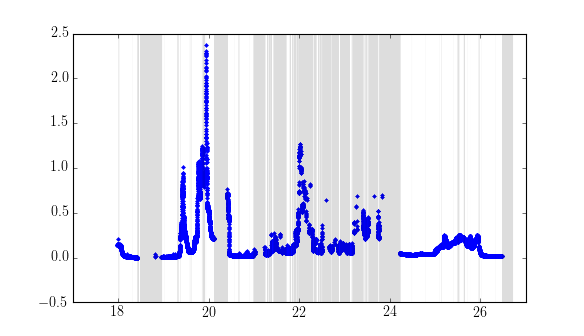

In [94]:
plt.figure()
plt.plot(out_R2[0][nm[0]],out_R2[0][nm[9]],'.')
for x in out_R2[0][nm[0]][np.where(out_R2[0][nm[4]]==1)[0]]:
    plt.axvline(x,color='#DDDDDD',alpha=0.02)

In [104]:
import cmaps

<IPython.core.display.Javascript object>


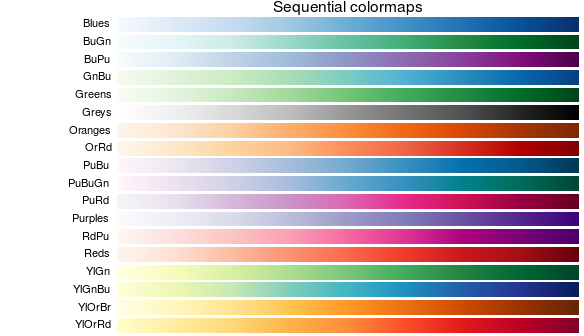

<IPython.core.display.Javascript object>


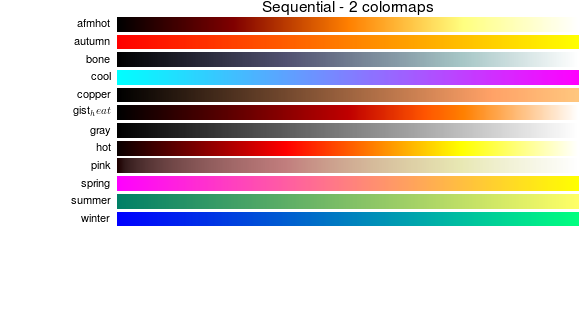

<IPython.core.display.Javascript object>


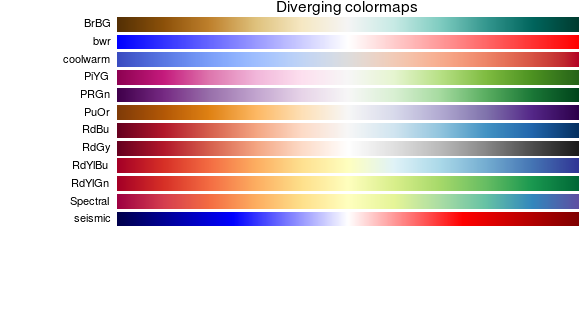

<IPython.core.display.Javascript object>


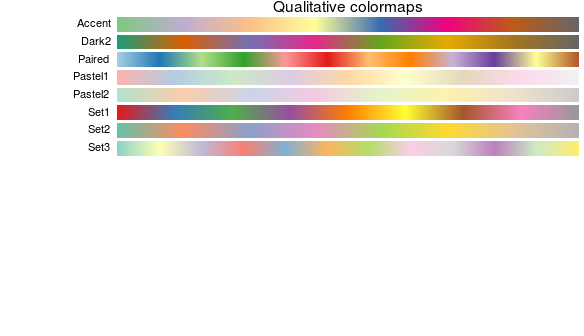

<IPython.core.display.Javascript object>


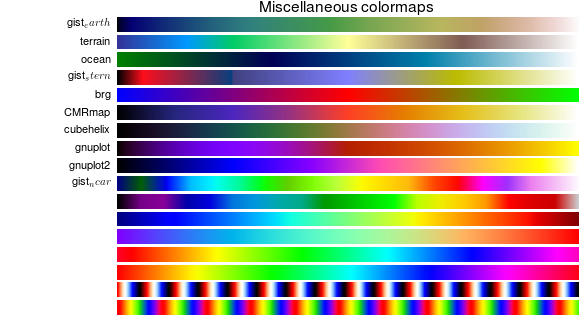

In [105]:
cmaps.cmaps()

In [24]:
for a in wl:
    print a

AOD0380
AOD0452
AOD0501
AOD0520
AOD0532
AOD0550
AOD0606
AOD0620
AOD0675
AOD0781
AOD0865
AOD1020
AOD1040
AOD1064
AOD1236
AOD1559


<IPython.core.display.Javascript object>


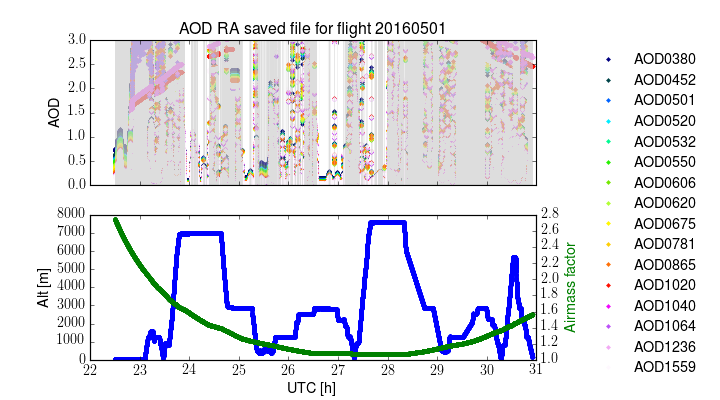

<IPython.core.display.Javascript object>


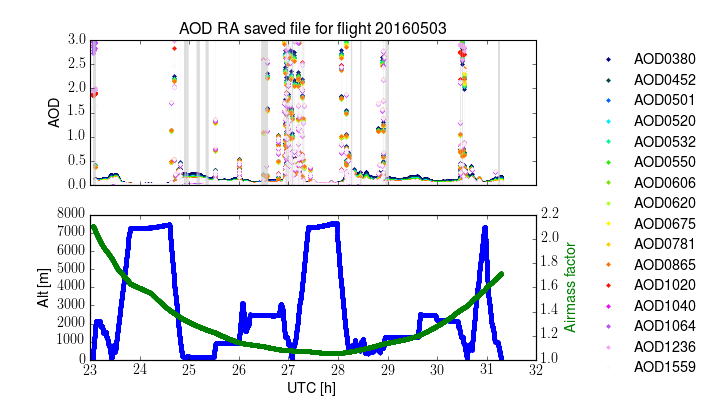

<IPython.core.display.Javascript object>


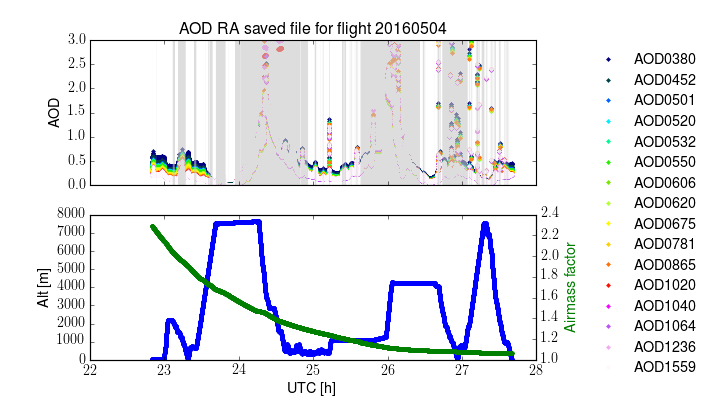

<IPython.core.display.Javascript object>


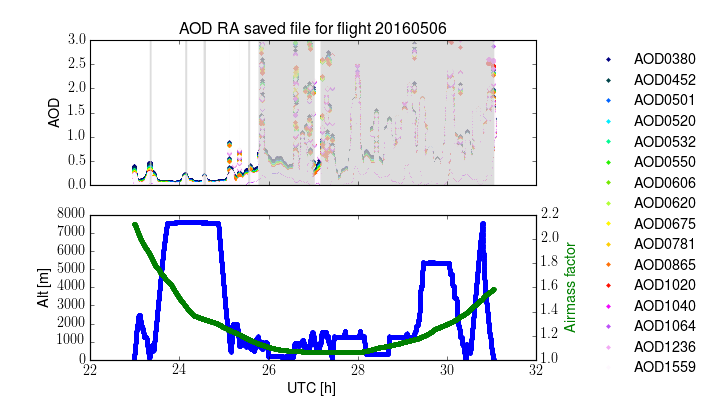

In [29]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD RA saved file for flight {}'.format(d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outaod_RA[i][nm[0]],outaod_RA[i][aod],'.',label=aod)
    try:
        for x in outaod_RA[i][nm[0]][np.where(outaod_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,2)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/RA_{}.png'.format(d),dpi=600,transparent=True)

In [ ]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outgas_RA[i][nm[0]],outgas_RA[i][aod],'.',label=aod)
    try:
        for x in outgas_RA[i][nm[0]][np.where(outgas_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/RA_{}.png'.format(d),dpi=600,transparent=True)

In [32]:
outgas_RA[0].dtype.names

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'amass_O3',
 'amass_NO2',
 'CWV',
 'std_CWV',
 'QA_CWV',
 'VCD_O3',
 'resid_O3',
 'QA_O3',
 'VCD_NO2',
 'resid_NO2',
 'QA_NO2',
 'qual_flag')

<IPython.core.display.Javascript object>


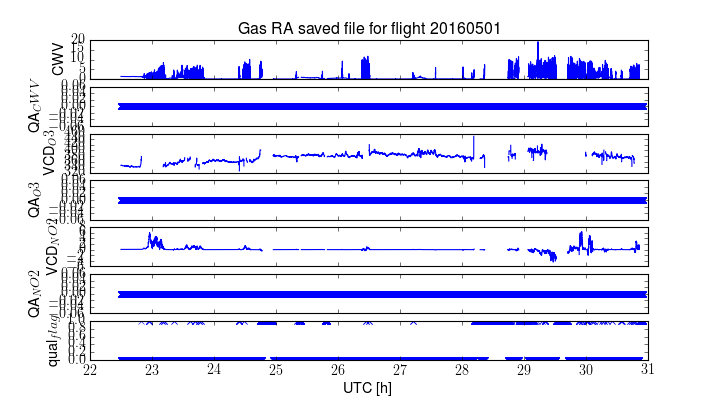

<IPython.core.display.Javascript object>


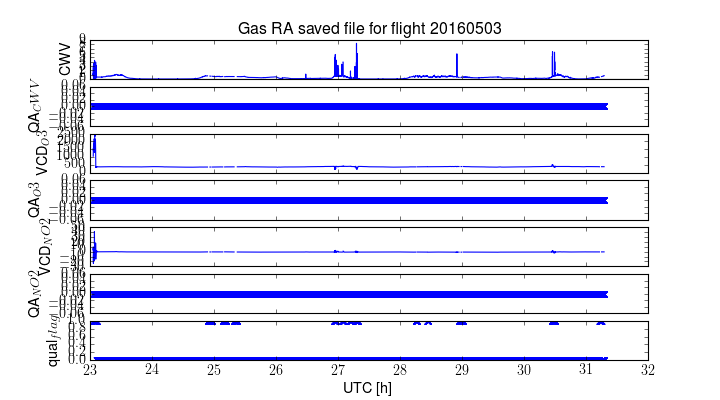

<IPython.core.display.Javascript object>


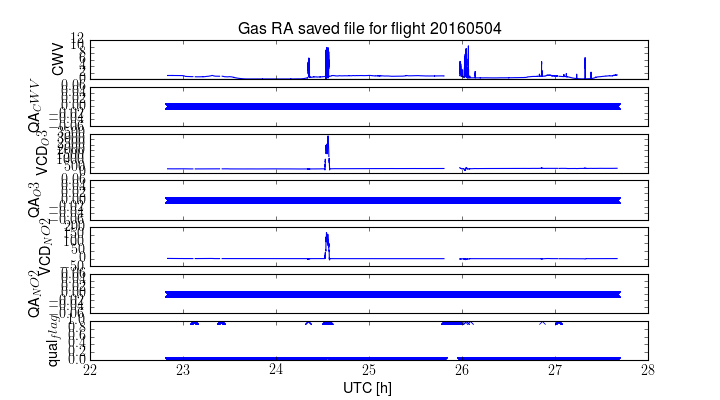

<IPython.core.display.Javascript object>


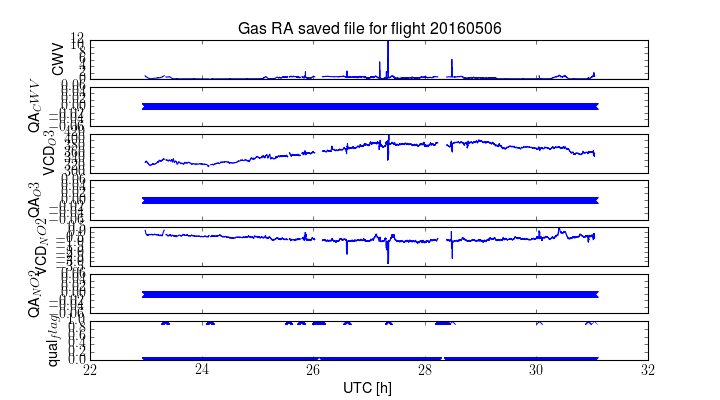

In [36]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(7,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    
    ax[0].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['CWV'])
    ax[0].set_ylabel('CWV')
    #ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    #box = ax[0].get_position()
    #ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_CWV'],'x')
    ax[1].set_ylabel('QA_CWV')
    
    ax[2].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_O3'])
    ax[2].set_ylabel('VCD_O3')
    
    ax[3].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_O3'],'x')
    ax[3].set_ylabel('QA_O3')
    
    ax[4].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_NO2'])
    ax[4].set_ylabel('VCD_NO2')
    
    ax[5].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_NO2'],'x')
    ax[5].set_ylabel('QA_NO2')
    
    ax[6].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['qual_flag'],'x')
    ax[6].set_ylabel('qual_flag')
    
    ax[6].set_xlabel('UTC [h]')